# Descriptive Statisitics

In [48]:
#This jupyter notebook is dedicated for descriptive statistics

In [156]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [157]:
#import the dataset
df = pd.read_csv('jobs.csv')

In [143]:
df.head(10)

,Job Title,Company Name,Lower Bar Salary,Highest Bar Salary,Average Salary,Job Type,Job Description
0,Senior Accountant,Furey Financial Services,80000,100000,90000,Full-time,"\n\nRemote \nSalary Range: $80,000-$100,000\n ..."
1,Senior Accountant,Tokio Marine HCC,undecided,undecided,#VALUE!,Full-time,\nStatutory Reporting Accountant Tokio Marine...
2,Junior Accountant,Scale Microgrid Solutions,42293,72698,57495.5,Full-time,\n\nThe Role\n\n\n We are looking for a Seni...
3,Manager,Electric Power Research Institute,79815,107985,93900,Full-time,\n\n Job Title:\n International Accountant\n...
4,Manager,JANUS Research Group,undecided,undecided,#VALUE!,Full-time,\nThis position is remote.\n\nEnsures that tra...
5,Junior Accountant,Work World,60000,65000,62500,Full-time,\n\nAbout Work World/Whistle Workwear\n Headqu...
6,Senior Accountant,Choice Market,50000,70000,60000,Full-time,\n Choice Market is committed to making high-q...
7,Senior Accountant,Newberry Library,60000,70000,65000,Full-time,\n\n\nTO APPLY: Interested candidates should a...
8,Senior Accountant,Campus Life & Style,75000,90000,82500,Full-time,Who We Are:\nCampus Life & Style’s mission is ...
9,Senior Accountant,Friday Health Plans,73569,87422,80495.5,Full-time,\nWho You Are\n You are ready for an exciting ...


Job Titles

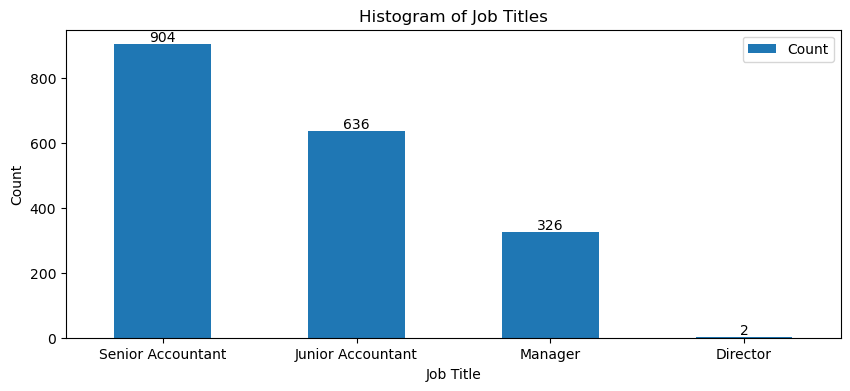

In [160]:
# Generate the value counts of the 'Job Title' column and reset the index
job_title_counts = df['Job Title'].value_counts().reset_index()

# Rename the columns to 'Job Title' and 'Count'
job_title_counts = job_title_counts.rename(columns={'index': 'Job Title', 'Job Title': 'Count'})

# Plot the histogram
ax = job_title_counts.plot(kind='bar', x='Job Title', y='Count', figsize=(10, 4))
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Histogram of Job Titles')

# Rotate x-axis ticks by 90 degrees
plt.xticks(rotation=0)

# Add text annotations for the count at the end of each bar
for i, count in enumerate(job_title_counts['Count']):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Save the histogram as a PNG file with a width of 500 pixels
plt.savefig('job_titles_histogram.png', dpi=500)
plt.show()

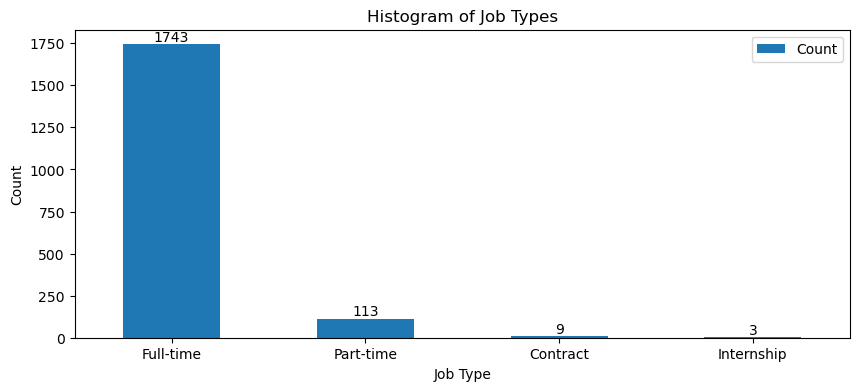

In [172]:
# Generate the value counts of the 'Job Type' column and reset the index
job_type_counts = df['Job Type'].value_counts().reset_index()

# Rename the columns to 'Job Type' and 'Count'
job_type_counts = job_type_counts.rename(columns={'index': 'Job Type', 'Job Type': 'Count'})

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 4))
job_type_counts.plot(kind='bar', x='Job Type', y='Count', ax=ax)

plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Histogram of Job Types')

# Rotate x-axis ticks by 90 degrees
plt.xticks(rotation=0)

# Add text annotations for the count at the end of each bar
for i, count in enumerate(job_type_counts['Count']):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Save the histogram as a PNG file with a width of 500 pixels
plt.savefig('job_types_histogram.png', dpi=500)
plt.show()

Lower Bar Salary

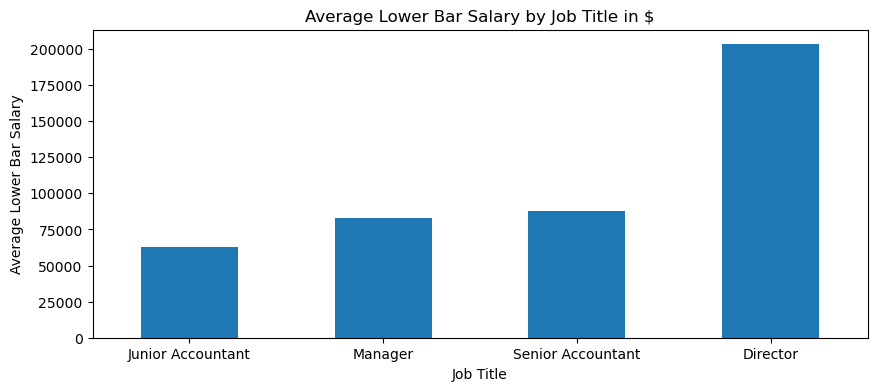

In [165]:
#Replace the undecided with nans
df['Lower Bar Salary'] = df['Lower Bar Salary'].replace({'undecided': np.nan})

#Change the dtype to float
df['Lower Bar Salary'] = df['Lower Bar Salary'].astype(float)

# Create a new dataset that takes into consideration 
df_no_nan = df.dropna(subset=['Lower Bar Salary'])

# Plot the average lower bar per title
df2 = df_no_nan.groupby(['Job Title'])['Lower Bar Salary'].mean().sort_values()
fig, ax = plt.subplots(figsize=(10,4))  # Set the figure size
df2.plot.bar(rot=0, ax=ax)

plt.xlabel('Job Title')
plt.ylabel('Average Lower Bar Salary')
plt.title('Average Lower Bar Salary by Job Title in $')
plt.savefig('lowerbar.png', dpi=500)
plt.show()

Higher Bar Salary

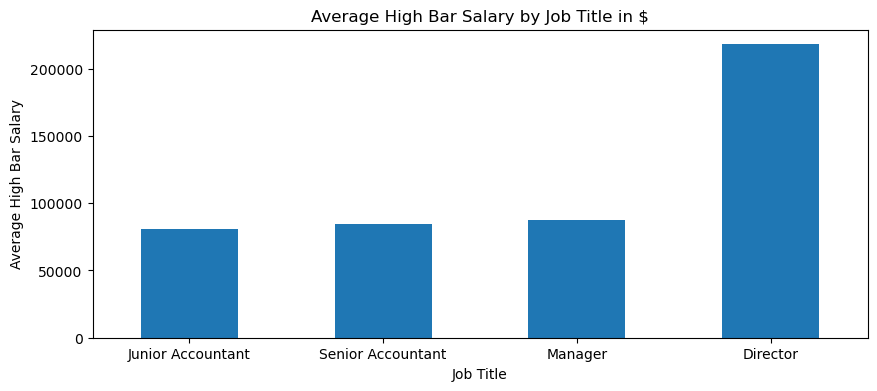

In [178]:
#Replace the undecided with nans
df['Highest Bar Salary'] = df['Highest Bar Salary'].replace({'undecided': pd.NA})
df.loc[407, 'Highest Bar Salary'] = 230000

#Drop observations with missing Highest Bar salary
df_no_nan2 = df.dropna(subset=['Highest Bar Salary'])

#Replace '120,000$' with 120,000 and convert the column to float
df_no_nan2['Highest Bar Salary'] = df_no_nan2['Highest Bar Salary'].replace('120,000$', 120000)
df_no_nan2['Highest Bar Salary'] = df_no_nan2['Highest Bar Salary'].astype(float)

#Plot the Higher Bar of the Salary
df3 = df_no_nan2.groupby(['Job Title'])['Highest Bar Salary'].mean().sort_values()
fig, ax = plt.subplots(figsize=(10,4))
df3.plot.bar(x='Job Title', y='Highest Bar Salary', rot=0, ax=ax)

plt.xlabel('Job Title')
plt.ylabel('Average High Bar Salary')
plt.title('Average High Bar Salary by Job Title in $')

#Save the histogram as a PNG file with a width of 500 pixels
plt.savefig('Higherbar.png', dpi=500)
plt.show()

Average Salary

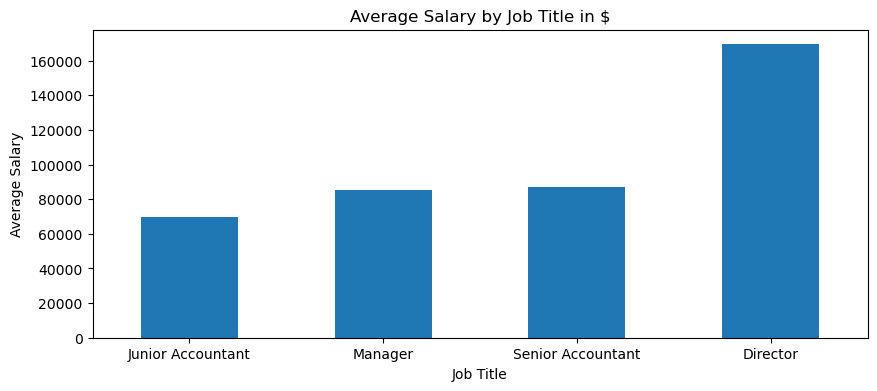

In [182]:
# Replace '#VALUE!' with nans
df['Average Salary'] = df['Average Salary'].replace({'#VALUE!': pd.NA})
df.loc[407, 'Highest Bar Salary'] = 230000

# Drop observations with missing Average salary
df4 = df.dropna(subset=['Average Salary'])

# Convert the column to float
df4['Average Salary'] = df4['Average Salary'].astype(float)

# Plot the Average Salary
df5 = df4.groupby(['Job Title'])['Average Salary'].mean().sort_values()
fig, ax = plt.subplots(figsize=(10, 4))
df5.plot.bar(x='Job Title', y='Average Salary', rot=0, ax=ax)

plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Title in $')

# Save the histogram as a PNG file with a width of 500 pixels
plt.savefig('Average_Salary.png', dpi=500)
plt.show()